# Sesión 06 - Manejo de Modelos de Clasificación para entornos operativos

*Objetivo*

- Aplicar algoritmos de clasificación para identificar eventos operacionales críticos en la industria petrolera.
- Evaluar el rendimiento de diferentes clasificadores.
- Interpretar los resultados y la matriz de confusión.
- Analizar la eficiencia en pozos productores.

In [1]:
!python --version


Python 3.12.1


## 0. Carga de Librerías

In [3]:
# Instalación de dependencias del nuevo codespace
!pip install -r ../requirements.txt


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
# Importación de Librerías
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error

## 1. Carga de Datos

In [7]:
# Carga desde la carpeta data/raw/
# Ruta absoluta
df = pd.read_csv('/workspaces/ml-bootcamp-labs/data/raw/Operational_events.csv')
df

,Well_ID,Date,Time,Pressure,Temperature,Flow_Rate,Pump_Speed,Gas_Oil_Ratio,Water_Cut,Vibration,Event_Type,Maintenance_Required,Downtime
0,7.0,2023-12-15,14:42:07,3394.633937,131.203728,155.994520,174.250837,1326.028990,0.601115,7.080726,Normal,0.0,0.000000
1,2.0,2023-12-10,11:29:37,1003.115063,298.442312,617.481510,1834.959481,NaN,0.023062,5.247747,Normal,0.0,0.000000
2,16.0,2023-09-28,14:50:43,3056.937754,218.482914,46.450413,1822.634556,421.681361,NaN,9.488855,Blockage,1.0,59.737430
3,9.0,2023-12-12,20:01:19,1964.101864,236.652704,609.996658,2499.584735,425.374050,0.391061,1.822361,Normal,0.0,0.000000
4,6.0,2023-02-23,09:03:53,1125.253170,268.456955,449.754133,1185.450708,1404.656526,0.727272,3.265408,Normal,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2.0,2023-11-10,17:22:01,1224.855622,249.504127,850.852757,858.405127,1032.581456,0.314162,9.579711,Normal,0.0,0.000000
496,9.0,2023-09-16,13:54:10,1870.915599,224.245306,48.078968,1450.723757,219.041265,0.921144,9.760860,Normal,0.0,0.000000
497,8.0,2023-01-16,16:50:53,4580.306237,214.785827,350.777623,2498.081239,841.428711,0.911633,9.280142,Normal,0.0,0.000000
498,11.0,2023-04-13,08:41:49,3258.376325,150.464549,915.289940,797.056695,1364.560451,NaN,6.565627,Blockage,1.0,18.799964


## 2. EDA (Medidas de Tendencia Central, Análisis de Nulos)

In [8]:
# Métodos info(), describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Well_ID               475 non-null    float64
 1   Date                  475 non-null    object 
 2   Time                  475 non-null    object 
 3   Pressure              475 non-null    float64
 4   Temperature           475 non-null    float64
 5   Flow_Rate             475 non-null    float64
 6   Pump_Speed            475 non-null    float64
 7   Gas_Oil_Ratio         475 non-null    float64
 8   Water_Cut             475 non-null    float64
 9   Vibration             475 non-null    float64
 10  Event_Type            500 non-null    object 
 11  Maintenance_Required  475 non-null    float64
 12  Downtime              475 non-null    float64
dtypes: float64(10), object(3)
memory usage: 50.9+ KB


In [9]:
df.describe()

,Well_ID,Pressure,Temperature,Flow_Rate,Pump_Speed,Gas_Oil_Ratio,Water_Cut,Vibration,Maintenance_Required,Downtime
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000
mean,10.362105,2960.284279,202.865593,490.951223,1474.688338,826.067573,0.517296,4.767155,0.193684,9.716888
std,5.803338,1169.230972,56.146715,285.666948,855.630251,371.162601,0.293007,2.825830,0.395601,25.604104
min,1.000000,1001.771126,100.270725,0.011635,3.088440,204.183743,0.001992,0.031409,0.000000,0.000000
25%,5.000000,1920.023988,153.730480,253.453970,692.447336,496.807440,0.275245,2.228550,0.000000,0.000000
50%,10.000000,3021.461026,204.310197,486.173654,1537.964259,825.174981,0.519032,4.809060,0.000000,0.000000
75%,15.000000,3966.937400,251.558604,729.514778,2177.116863,1136.238405,0.756875,7.076513,0.000000,0.000000
max,20.000000,4990.997556,299.361836,995.734452,2999.141412,1495.535353,0.997518,9.966969,1.000000,152.279829


In [11]:
df.loc[ df.Pressure.isnull()]

,Well_ID,Date,Time,Pressure,Temperature,Flow_Rate,Pump_Speed,Gas_Oil_Ratio,Water_Cut,Vibration,Event_Type,Maintenance_Required,Downtime
5,8.0,2023-08-01,15:44:17,NaN,217.350233,965.255307,1821.102743,558.798937,0.296274,1.652669,Normal,0.0,0.000000
21,6.0,2023-04-09,08:36:23,NaN,210.552993,572.292469,2940.994751,297.950133,0.305697,1.909110,Normal,0.0,0.000000
36,4.0,2023-02-22,22:15:56,NaN,286.185821,974.248209,2987.793726,272.632501,0.737036,5.459158,Normal,0.0,0.000000
85,13.0,2023-07-20,01:52:08,NaN,245.637751,495.491316,2065.207189,765.275540,0.246402,8.191023,Normal,0.0,0.000000
128,2.0,2023-03-23,12:40:22,NaN,263.566843,120.209055,1633.467294,207.486259,0.324586,3.664615,Normal,0.0,0.000000
134,17.0,2023-10-25,23:35:19,NaN,261.198510,550.226542,130.237599,1023.096788,0.951403,6.016118,Leak,1.0,42.905084
184,3.0,2023-12-31,02:26:49,NaN,201.410221,NaN,100.150805,672.801062,0.732635,8.203775,Normal,0.0,0.000000
194,15.0,NaN,05:52:35,NaN,148.378766,12.404036,1406.303896,591.644839,0.598357,2.972378,Normal,0.0,0.000000
201,NaN,2023-12-07,20:48:41,NaN,286.350744,397.015041,261.278300,1002.186471,0.113838,3.452231,Normal,0.0,0.000000
215,3.0,2023-09-09,17:39:21,NaN,NaN,201.312108,1185.413230,251.297393,0.475546,5.430246,Normal,0.0,0.000000


In [12]:
df.loc[ df.Well_ID.isnull()]

,Well_ID,Date,Time,Pressure,Temperature,Flow_Rate,Pump_Speed,Gas_Oil_Ratio,Water_Cut,Vibration,Event_Type,Maintenance_Required,Downtime
13,NaN,2023-08-12,00:00:18,3722.821806,206.186917,447.783165,1658.679267,970.505741,0.080853,3.696545,Normal,0.0,0.00000
55,NaN,2023-01-15,22:36:27,1080.284791,164.415833,211.448007,982.492057,355.690771,0.890527,5.935925,Normal,0.0,0.00000
83,NaN,2023-03-05,01:59:53,3952.134466,NaN,603.152109,736.047329,706.084298,0.288694,3.556727,Normal,0.0,0.00000
95,NaN,2023-09-19,04:04:53,4876.410521,276.757177,927.752283,2984.723468,426.063824,0.396242,7.582385,Normal,0.0,0.00000
124,NaN,2023-06-27,22:43:37,1558.605019,105.994718,307.929942,2114.042288,462.409488,0.673432,9.699120,Normal,0.0,0.00000
135,NaN,2023-01-26,08:14:09,1699.093771,172.154504,905.891105,NaN,923.628175,0.255645,3.020605,Normal,0.0,0.00000
144,NaN,2023-08-25,01:40:20,2385.287074,147.811066,509.724247,2475.858325,563.614600,0.942387,8.733367,Normal,NaN,0.00000
159,NaN,2023-03-19,08:40:24,3121.208533,108.390245,968.488778,2396.142575,580.668648,0.979970,6.018816,Normal,0.0,0.00000
201,NaN,2023-12-07,20:48:41,NaN,286.350744,397.015041,261.278300,1002.186471,0.113838,3.452231,Normal,0.0,0.00000
202,NaN,2023-02-08,12:10:45,4971.267356,126.297824,274.731526,1183.728227,748.376632,0.411021,9.076110,Normal,0.0,NaN


<Axes: >

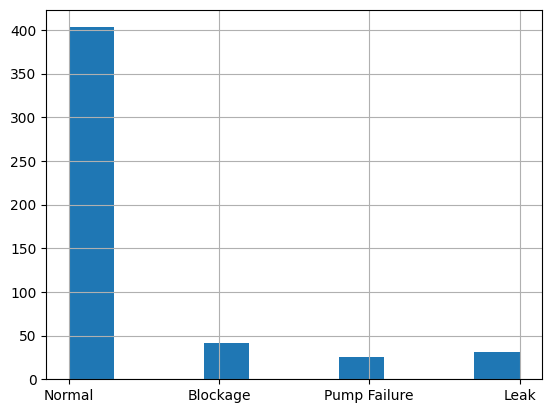

In [13]:
df.Event_Type.hist()

## 3. Transformaciones (Encoding, Imputación)

In [14]:
df.isnull().sum()

Well_ID                 25
Date                    25
Time                    25
Pressure                25
Temperature             25
Flow_Rate               25
Pump_Speed              25
Gas_Oil_Ratio           25
Water_Cut               25
Vibration               25
Event_Type               0
Maintenance_Required    25
Downtime                25
dtype: int64

In [15]:
df.Pressure.describe()

count     475.000000
mean     2960.284279
std      1169.230972
min      1001.771126
25%      1920.023988
50%      3021.461026
75%      3966.937400
max      4990.997556
Name: Pressure, dtype: float64

<Axes: >

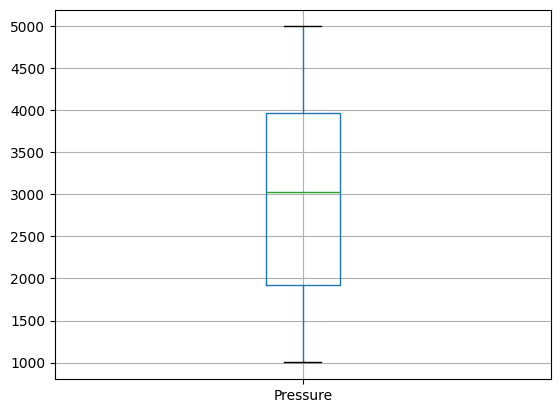

In [19]:
df.Pressure.to_frame().boxplot()

In [ ]:
# Metodo de imputacion simple 
# cuando tenemos pocas variables podemos completar el valor faltante con una medida de tendencia central como la media
df.Temperature.fillna(df.Temperature.mean())
df.Pressure.fillna(df.Temperature.mean())

In [21]:
# Metodo de imputacion simple 
# carga la libreria de SimpleImputer}
from sklearn.impute import SimpleImputer

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Event_Type_n'] = label_encoder.fit_transform(df.Event_Type)
df[["Event_Type_n","Event_Type"]].value_counts()

Event_Type_n  Event_Type  
2             Normal          403
0             Blockage         41
1             Leak             31
3             Pump Failure     25
Name: count, dtype: int64

In [29]:
# Diccionario Manual para hacer la codificacion
manual_encode = {
    "Normal" : 0,
    "Blockage" : 1,
    "Leak" : 2,
    "Pump Failure": 3
}

df.Event_Type.map(manual_encode)

0      0
1      0
2      1
3      0
4      0
      ..
495    0
496    0
497    0
498    1
499    0
Name: Event_Type, Length: 500, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Well_ID               475 non-null    float64
 1   Date                  475 non-null    object 
 2   Time                  475 non-null    object 
 3   Pressure              475 non-null    float64
 4   Temperature           475 non-null    float64
 5   Flow_Rate             475 non-null    float64
 6   Pump_Speed            475 non-null    float64
 7   Gas_Oil_Ratio         475 non-null    float64
 8   Water_Cut             475 non-null    float64
 9   Vibration             475 non-null    float64
 10  Event_Type            500 non-null    object 
 11  Maintenance_Required  475 non-null    float64
 12  Downtime              475 non-null    float64
 13  Event_Type_n          500 non-null    int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 54.8+ KB


In [31]:
# Instrucción para descartar columnas que no sean numéricas
# Y aparte renombra la columna codificada por el nombre original
df_encoded = df.select_dtypes(exclude=['object']).rename(columns={"Event_Type_n":"Event_Type"})

In [32]:
df_encoded

,Well_ID,Pressure,Temperature,Flow_Rate,Pump_Speed,Gas_Oil_Ratio,Water_Cut,Vibration,Maintenance_Required,Downtime,Event_Type
0,7.0,3394.633937,131.203728,155.994520,174.250837,1326.028990,0.601115,7.080726,0.0,0.000000,2
1,2.0,1003.115063,298.442312,617.481510,1834.959481,NaN,0.023062,5.247747,0.0,0.000000,2
2,16.0,3056.937754,218.482914,46.450413,1822.634556,421.681361,NaN,9.488855,1.0,59.737430,0
3,9.0,1964.101864,236.652704,609.996658,2499.584735,425.374050,0.391061,1.822361,0.0,0.000000,2
4,6.0,1125.253170,268.456955,449.754133,1185.450708,1404.656526,0.727272,3.265408,0.0,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
495,2.0,1224.855622,249.504127,850.852757,858.405127,1032.581456,0.314162,9.579711,0.0,0.000000,2
496,9.0,1870.915599,224.245306,48.078968,1450.723757,219.041265,0.921144,9.760860,0.0,0.000000,2
497,8.0,4580.306237,214.785827,350.777623,2498.081239,841.428711,0.911633,9.280142,0.0,0.000000,2
498,11.0,3258.376325,150.464549,915.289940,797.056695,1364.560451,NaN,6.565627,1.0,18.799964,0


In [33]:
# Carga de librería de SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
df_imputado = pd.DataFrame( imputer.fit_transform(df_encoded), columns= df_encoded.columns  )

In [34]:
df_imputado

,Well_ID,Pressure,Temperature,Flow_Rate,Pump_Speed,Gas_Oil_Ratio,Water_Cut,Vibration,Maintenance_Required,Downtime,Event_Type
0,7.0,3394.633937,131.203728,155.994520,174.250837,1326.028990,0.601115,7.080726,0.0,0.000000,2.0
1,2.0,1003.115063,298.442312,617.481510,1834.959481,826.067573,0.023062,5.247747,0.0,0.000000,2.0
2,16.0,3056.937754,218.482914,46.450413,1822.634556,421.681361,0.517296,9.488855,1.0,59.737430,0.0
3,9.0,1964.101864,236.652704,609.996658,2499.584735,425.374050,0.391061,1.822361,0.0,0.000000,2.0
4,6.0,1125.253170,268.456955,449.754133,1185.450708,1404.656526,0.727272,3.265408,0.0,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...
495,2.0,1224.855622,249.504127,850.852757,858.405127,1032.581456,0.314162,9.579711,0.0,0.000000,2.0
496,9.0,1870.915599,224.245306,48.078968,1450.723757,219.041265,0.921144,9.760860,0.0,0.000000,2.0
497,8.0,4580.306237,214.785827,350.777623,2498.081239,841.428711,0.911633,9.280142,0.0,0.000000,2.0
498,11.0,3258.376325,150.464549,915.289940,797.056695,1364.560451,0.517296,6.565627,1.0,18.799964,0.0


In [59]:
df[["Event_Type_n","Event_Type"]].value_counts()


Event_Type_n  Event_Type  
2             Normal          403
0             Blockage         41
1             Leak             31
3             Pump Failure     25
Name: count, dtype: int64

In [60]:
# regla de balanceo de clases
(41+31+25)/3 *1.1


35.56666666666667

In [65]:
majority_class_df_sample = df_imputado.loc[df_imputado.Event_Type == 2].sample(35)


## 4. Modelamiento

In [35]:
# Carga de librerías para modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [38]:
X = df_imputado.drop(columns=['Event_Type'])
y = df_imputado.Event_Type
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=23 )

In [39]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
model_knc = KNeighborsClassifier()
model_knc.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
model_svc = SVC()
model_svc.fit(X_train,y_train)

SVC()

In [47]:
predict_dtc = model_dtc.predict(X_test)
predict_knc = model_knc.predict(X_test)
predict_svc = model_svc.predict(X_test)

## 5. Evaluación

In [51]:
# Evaluación DTC
dtc_accuracy = accuracy_score(y_pred= predict_dtc, y_true= y_test) 
dtc_precision = precision_score(y_pred= predict_dtc, y_true= y_test,average='weighted')
dtc_recall = recall_score(y_pred= predict_dtc, y_true= y_test,average='weighted')
dtc_f1 = f1_score(y_pred= predict_dtc, y_true= y_test,average='weighted')
dtc_cmatrix = confusion_matrix(y_pred= predict_dtc, y_true= y_test)

In [49]:
print(dtc_accuracy)
print(dtc_precision)
print(dtc_recall)
print(dtc_f1)

0.92
0.9229999999999999
0.92
0.9208888888888889


In [50]:
dtc_cmatrix

array([[ 1,  2,  0,  1],
       [ 3,  3,  0,  0],
       [ 0,  0, 87,  0],
       [ 1,  1,  0,  1]])

In [52]:
# Evaluación KNC
knc_accuracy = accuracy_score(y_pred= predict_knc, y_true= y_test) 
knc_precision = precision_score(y_pred= predict_knc, y_true= y_test,average='weighted')
knc_recall = recall_score(y_pred= predict_knc, y_true= y_test,average='weighted')
knc_f1 = f1_score(y_pred= predict_knc, y_true= y_test,average='weighted')
knc_cmatrix = confusion_matrix(y_pred= predict_knc, y_true= y_test)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [53]:
print(knc_accuracy)
print(knc_precision)
print(knc_recall)
print(knc_f1)

0.84
0.7534020618556702
0.84
0.7943478260869564


In [54]:
knc_cmatrix

array([[ 0,  0,  4,  0],
       [ 0,  0,  6,  0],
       [ 2,  1, 84,  0],
       [ 0,  0,  3,  0]])

In [55]:
# Evaluación SVC
svc_accuracy = accuracy_score(y_pred= predict_svc, y_true= y_test) 
svc_precision = precision_score(y_pred= predict_svc, y_true= y_test,average='weighted')
svc_recall = recall_score(y_pred= predict_svc, y_true= y_test,average='weighted')
svc_f1 = f1_score(y_pred= predict_svc, y_true= y_test,average='weighted')
svc_cmatrix = confusion_matrix(y_pred= predict_svc, y_true= y_test)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [56]:
print(svc_accuracy)
print(svc_precision)
print(svc_recall)
print(svc_f1)

0.87
0.7569
0.87
0.8095187165775402


In [57]:
svc_cmatrix

array([[ 0,  0,  4,  0],
       [ 0,  0,  6,  0],
       [ 0,  0, 87,  0],
       [ 0,  0,  3,  0]])